# Introducción a la Ciencia de Datos+
## Módulo 2: Estadística
**Dr. Juliho Castillo Colmenares, INFOTEC**

En este módulo, introduciremos los conceptos estadísticos más básicos, que nos permitirán analizar de manera más profunda nuestros datos. Con este objetivo, desarrollaremos proyecciones de la producción de carne a nivel global.

### Exploración de datos

In [1]:
"""
Importamos las librerías que utilizaremos en este proyecto
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
"""
Analizaremos la producción mundial de carne medida en toneladas
"""
# https://ourworldindata.org/meat-production
data = pd.read_csv("global-meat-production-by-livestock-type.csv")
data.head()

,Entity,Code,Year,Livestock Primary - Sheep and Goat Meat - 1807 - Production - 5510 - tonnes,Livestock Primary - Beef and Buffalo Meat - 1806 - Production - 5510 - tonnes,"Livestock Primary - Meat, pig - 1035 - Production - 5510 - tonnes","Livestock Primary - Meat, game - 1163 - Production - 5510 - tonnes","Livestock Primary - Meat, duck - 1069 - Production - 5510 - tonnes","Livestock Primary - Meat, Poultry - 1808 - Production - 5510 - tonnes","Livestock Primary - Meat, horse - 1097 - Production - 5510 - tonnes","Livestock Primary - Meat, camel - 1127 - Production - 5510 - tonnes","Livestock Primary - Meat, goose and guinea fowl - 1073 - Production - 5510 - tonnes"
0,Afghanistan,AFG,1961,73220.0,43000.0,NaN,4000.0,NaN,5600.0,NaN,3600.0,NaN
1,Afghanistan,AFG,1962,72375.0,45800.0,NaN,4000.0,NaN,6000.0,NaN,4031.0,NaN
2,Afghanistan,AFG,1963,75530.0,47250.0,NaN,5000.0,NaN,6160.0,NaN,5031.0,NaN
3,Afghanistan,AFG,1964,79750.0,48000.0,NaN,5000.0,NaN,6400.0,NaN,4680.0,NaN
4,Afghanistan,AFG,1965,84375.0,48700.0,NaN,6000.0,NaN,6800.0,NaN,4320.0,NaN


In [3]:
"""
Veamos las características de este conjunto de datos
"""
data.columns


Index(['Entity', 'Code', 'Year',
       'Livestock Primary - Sheep and Goat Meat - 1807 - Production - 5510 - tonnes',
       'Livestock Primary - Beef and Buffalo Meat - 1806 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, pig - 1035 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, game - 1163 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, duck - 1069 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, Poultry - 1808 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, horse - 1097 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, camel - 1127 - Production - 5510 - tonnes',
       'Livestock Primary - Meat, goose and guinea fowl - 1073 - Production - 5510 - tonnes'],
      dtype='object')

In [4]:
"""
Renombraremos las columnas para facilitar la manipulación 
"""
new_names = [
    "sheep", "beef", "pig", "game", "duck", "poultry", "horse", "camel", "goose"
]

In [5]:
"""
Guardaremos los cambios en un diccionario
"""
to_substitute = {
    key:val for key, val in zip(data.columns[3:], new_names)
}

In [6]:
"""
Renombraremos las columnas con este diccionario
"""
data = data.rename(columns=to_substitute)
data.head()

,Entity,Code,Year,sheep,beef,pig,game,duck,poultry,horse,camel,goose
0,Afghanistan,AFG,1961,73220.0,43000.0,NaN,4000.0,NaN,5600.0,NaN,3600.0,NaN
1,Afghanistan,AFG,1962,72375.0,45800.0,NaN,4000.0,NaN,6000.0,NaN,4031.0,NaN
2,Afghanistan,AFG,1963,75530.0,47250.0,NaN,5000.0,NaN,6160.0,NaN,5031.0,NaN
3,Afghanistan,AFG,1964,79750.0,48000.0,NaN,5000.0,NaN,6400.0,NaN,4680.0,NaN
4,Afghanistan,AFG,1965,84375.0,48700.0,NaN,6000.0,NaN,6800.0,NaN,4320.0,NaN


In [7]:
"""
Ahora veremos las categorías correspondiente a las entidades
"""
data["Entity"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Asia', 'Asia, Central', 'Australia',
       'Australia & New Zealand', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Caribbean', 'Central African Republic', 'Central America', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Eastern Africa', 'Eastern Asia', 'Eastern Eu

In [8]:
"""
Algunas entidades carecen de código
"""
americas = data["Entity"]=="Americas"
data[americas].head()

,Entity,Code,Year,sheep,beef,pig,game,duck,poultry,horse,camel,goose
290,Americas,NaN,1961,817969.0,13486597.0,7238952.0,247000.0,34994.0,4095642.0,152074.0,NaN,1741.0
291,Americas,NaN,1962,812122.0,13822119.0,7462867.0,233000.0,35803.0,4065507.0,157679.0,NaN,1767.0
292,Americas,NaN,1963,772645.0,14654649.0,7720522.0,247000.0,38731.0,4289898.0,176610.0,NaN,1848.0
293,Americas,NaN,1964,734023.0,15306404.0,7811009.0,247800.0,40865.0,4502575.0,210253.0,NaN,1985.0
294,Americas,NaN,1965,744383.0,15515875.0,7246741.0,248500.0,41410.0,4873793.0,203646.0,NaN,2133.0


In [9]:
"""
Revisemos cuales entidades no poseen código
"""
no_code = data["Code"].isna()
data[no_code]["Entity"].unique()

array(['Africa', 'Americas', 'Asia', 'Asia, Central',
       'Australia & New Zealand', 'Belgium-Luxembourg', 'Caribbean',
       'Central America', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Ethiopia PDR', 'Europe', 'Europe, Western',
       'European Union', 'Land Locked Developing Countries',
       'Least Developed Countries', 'Low Income Food Deficit Countries',
       'Micronesia (region)', 'Middle Africa',
       'Net Food Importing Developing Countries', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania',
       'Pacific Islands Trust Territory',
       'Small island developing States', 'South America',
       'South Eastern Asia', 'Southern Africa', 'Southern Asia',
       'Southern Europe', 'Sudan (former)', 'Western Africa',
       'Western Asia'], dtype=object)

In [10]:
"""
Ahora, inspeccionaremos los códigos de las entidades 
"""
codes = data[~no_code]["Code"].unique()
codes

array(['AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'OWID_CZS', 'COD', 'DNK', 'DJI', 'DMA', 'DOM',
       'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO',
       'DEU', 'GHA', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ',
       'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MLI', 'MLT',
       'MTQ', 'MRT', 'MUS', 'OWID_MNS', 'MEX', 'FSM', 'MDA', 'MNG', 'MNE',
       'MS

In [11]:
"""
Algunos códigos, van precedidos de la palabra OWID (Our World In Data), para indicar países que ya no existen
"""
for code in codes:
    if code[:4]=="OWID":
        print(code)

OWID_CZS
OWID_MNS
OWID_PYA
OWID_SRM
OWID_USS
OWID_WRL
OWID_YGS


In [12]:
"""
Vamos a eliminar los registros de dichos países
"""
country_codes = [code  for code in codes if code[:4]!="OWID"]
country_codes

['AFG',
 'ALB',
 'DZA',
 'ASM',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'VGB',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'KHM',
 'CMR',
 'CAN',
 'CPV',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COG',
 'COK',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'COD',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'SWZ',
 'ETH',
 'FRO',
 'FLK',
 'FJI',
 'FIN',
 'FRA',
 'GUF',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRL',
 'GRD',
 'GLP',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',
 'JPN',
 'JOR',
 'KAZ',
 'KEN',
 'KIR',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LBN',
 'LSO',
 'LBR',
 'LBY',
 'LTU',
 'LUX',
 'MAC',
 'MDG',
 'MWI',
 'MYS',
 'MLI',
 'MLT',
 'MTQ',
 'MRT',
 'MUS',
 'MEX',
 'FSM',
 'MDA',
 'MNG',
 'MNE',
 'MSR',


In [13]:
"""
Finalmente, nos quedaremos con los registros de países que actualmente existen
"""
data = data[data["Code"].isin(country_codes)]
data.head()

,Entity,Code,Year,sheep,beef,pig,game,duck,poultry,horse,camel,goose
0,Afghanistan,AFG,1961,73220.0,43000.0,NaN,4000.0,NaN,5600.0,NaN,3600.0,NaN
1,Afghanistan,AFG,1962,72375.0,45800.0,NaN,4000.0,NaN,6000.0,NaN,4031.0,NaN
2,Afghanistan,AFG,1963,75530.0,47250.0,NaN,5000.0,NaN,6160.0,NaN,5031.0,NaN
3,Afghanistan,AFG,1964,79750.0,48000.0,NaN,5000.0,NaN,6400.0,NaN,4680.0,NaN
4,Afghanistan,AFG,1965,84375.0,48700.0,NaN,6000.0,NaN,6800.0,NaN,4320.0,NaN


In [14]:
"""
Para acceder a los registros de manera más sencilla, utilizaremos el par entidad/año como índice
"""
data = data.drop(columns="Code").set_index(["Entity", "Year"])
data

sheep      beef      pig     game  duck  poultry  horse  \
Entity      Year                                                              
Afghanistan 1961  73220.0   43000.0      NaN   4000.0   NaN   5600.0    NaN   
            1962  72375.0   45800.0      NaN   4000.0   NaN   6000.0    NaN   
            1963  75530.0   47250.0      NaN   5000.0   NaN   6160.0    NaN   
            1964  79750.0   48000.0      NaN   5000.0   NaN   6400.0    NaN   
            1965  84375.0   48700.0      NaN   6000.0   NaN   6800.0    NaN   
...                   ...       ...      ...      ...   ...      ...    ...   
Zimbabwe    2014  24892.0   97891.0  20800.0  35000.0  68.0  57676.0    NaN   
            2015  21140.0  114297.0  21351.0  35419.0  68.0  61128.0    NaN   
            2016  18143.0  111470.0  20850.0  36629.0  71.0  66883.0    NaN   
            2017  25661.0  107633.0  17328.0  36769.0  71.0  69183.0    NaN   
            2018  25882.0  111133.0  17748.0  37059.0  71.0  66022.0    NaN   

                   camel  goose  
Entity      Year                 
Afghanistan 1961  3600.0    NaN  
            1962  4031.0    NaN  
            1963  5031.0    NaN  
            1964  4680.0    NaN  
            1965  4320.0    NaN  
...                  ...    ...  
Zimbabwe    2014     NaN    NaN  
            2015     NaN    NaN  
            2016     NaN    NaN  
            2017     NaN    NaN  
            2018     NaN    NaN  

[11302 rows x 9 columns]

<AxesSubplot:ylabel='None'>

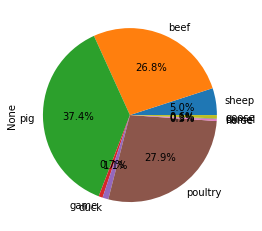

In [15]:
"""
Visualicemos el total de cada tipo de carne producida desde 1961
"""
data.sum().plot(kind="pie", autopct='%1.1f%%')

In [16]:
"""
Por default, la suma se hace recorriendo las filas
"""
data.sum(axis="rows")

sheep      5.238204e+08
beef       2.804376e+09
pig        3.911758e+09
game       7.839057e+07
duck       1.145854e+08
poultry    2.921682e+09
horse      3.548891e+07
camel      1.404844e+07
goose      6.485208e+07
dtype: float64

In [17]:
"""
Pero también podemos sumar recorriendo las columnas
"""
data.sum(axis="columns")

Entity       Year
Afghanistan  1961    129420.0
             1962    132206.0
             1963    138971.0
             1964    143830.0
             1965    150195.0
                       ...   
Zimbabwe     2014    236327.0
             2015    253403.0
             2016    254046.0
             2017    256645.0
             2018    257915.0
Length: 11302, dtype: float64

In [18]:
"""
También podemos sumar todos los datos correspondientes a una entidad
"""
data.groupby("Entity").sum()

,sheep,beef,pig,game,duck,poultry,horse,camel,goose
Entity,,,,,,,,,
Afghanistan,7477537.0,5598202.0,0.0,440936.0,0.0,878431.0,0.0,222136.0,0.0
Albania,938970.0,1385203.0,513890.0,0.0,0.0,418026.0,0.0,0.0,0.0
Algeria,8227999.0,4814851.0,5810.0,0.0,0.0,9195897.0,44041.0,158439.0,0.0
American Samoa,0.0,251.0,19047.0,0.0,0.0,1537.0,0.0,0.0,0.0
Angola,537081.0,3756792.0,1861566.0,398206.0,0.0,567079.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,827.0,370.0,14538.0,0.0,0.0,1922.0,0.0,0.0,0.0
Western Sahara,33823.0,0.0,0.0,0.0,0.0,0.0,0.0,68969.0,0.0
Yemen,2729633.0,2857919.0,0.0,0.0,0.0,3507454.0,0.0,137533.0,0.0


In [19]:
"""
O bien, correspondiente a un año 
"""
data.groupby("Year").sum()

,sheep,beef,pig,game,duck,poultry,horse,camel,goose
Year,,,,,,,,,
1961,4765326.0,25018135.0,20078914.0,804069.0,349100.0,7969007.0,528663.0,100878.0,152043.0
1962,4825488.0,26065384.0,21140840.0,796729.0,359606.0,8208557.0,511857.0,104522.0,158861.0
1963,4783678.0,27265945.0,22901727.0,819008.0,380653.0,8768904.0,520893.0,109362.0,159803.0
1964,4842498.0,27931151.0,24907463.0,841107.0,397002.0,9341678.0,556687.0,112932.0,168809.0
1965,4929189.0,28168057.0,26002850.0,852838.0,420766.0,10068308.0,537880.0,121219.0,183106.0
1966,5112463.0,29344655.0,27012039.0,866070.0,436441.0,10727879.0,502336.0,124842.0,189495.0
1967,5185630.0,30302534.0,28420567.0,893807.0,454140.0,11396907.0,490135.0,122992.0,201384.0
1968,5356044.0,31521070.0,29263322.0,914415.0,474332.0,11721601.0,502776.0,127437.0,217993.0
1969,5393574.0,32454782.0,29078473.0,944901.0,488692.0,12605830.0,515070.0,126207.0,214356.0


In [20]:
"""
Podemos concatenar estas técnicas, para obtener la producción total de un país desde 1961
"""
data.groupby("Entity").sum().sum(axis="columns")

Entity
Afghanistan          14617242.0
Albania               3256089.0
Algeria              22447037.0
American Samoa          20835.0
Angola                7120724.0
                        ...    
Wallis and Futuna       17657.0
Western Sahara         102792.0
Yemen                 9232539.0
Zambia                7506354.0
Zimbabwe              9255272.0
Length: 213, dtype: float64

<AxesSubplot:xlabel='Entity'>

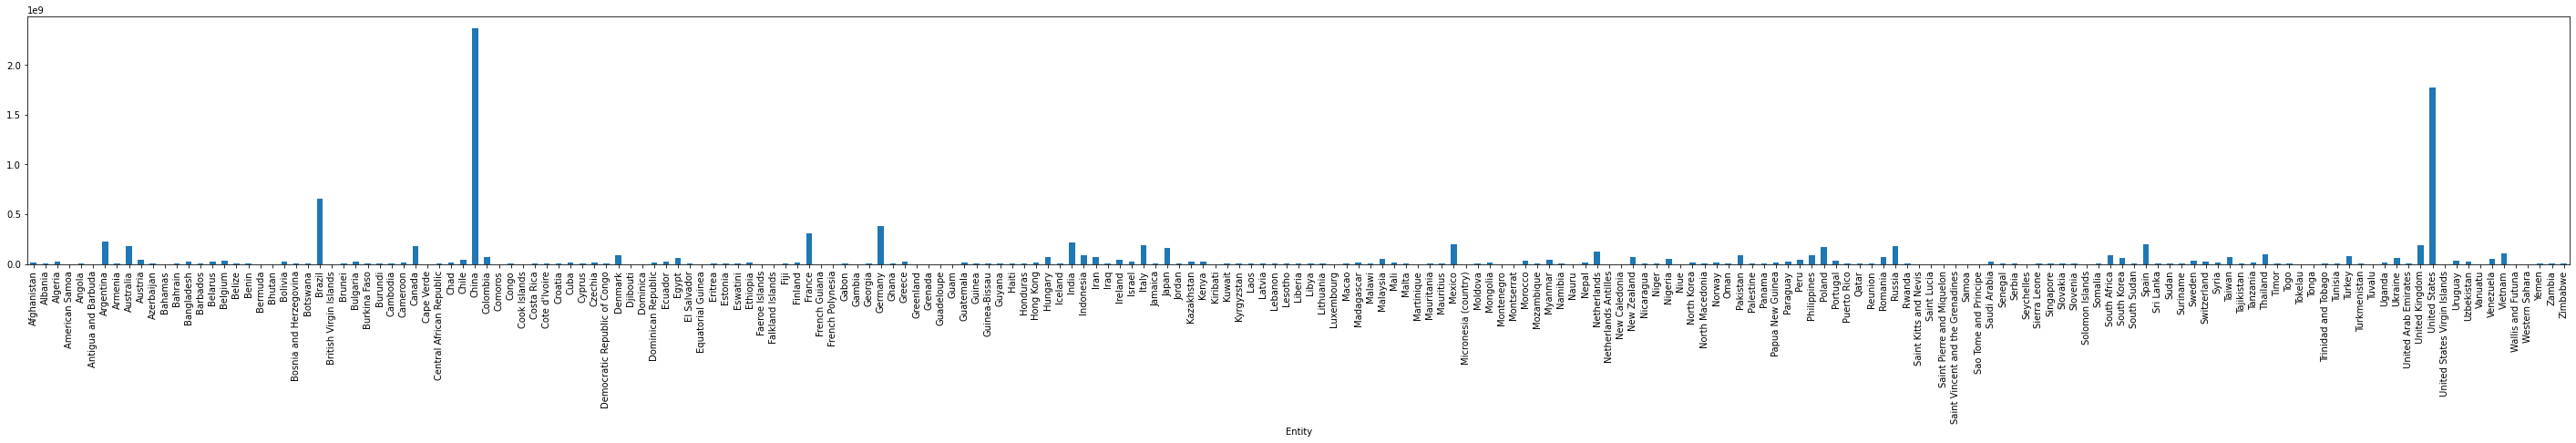

In [21]:
"""
Visualicemos la producción total de carne de cada país
"""
data.groupby("Entity").sum().sum(axis="columns").plot(kind="bar", figsize=(50,5))

In [22]:
"""
Vamos a localizar a los diez mayores productores históricos de carne
"""
data.groupby("Entity").sum().sum(axis="columns").sort_values(ascending=False).head(n=10)//10**6

Entity
China            2372.0
United States    1774.0
Brazil            660.0
Germany           380.0
France            309.0
Argentina         223.0
India             217.0
Mexico            202.0
Spain             200.0
Italy             188.0
dtype: float64

<AxesSubplot:xlabel='Year'>

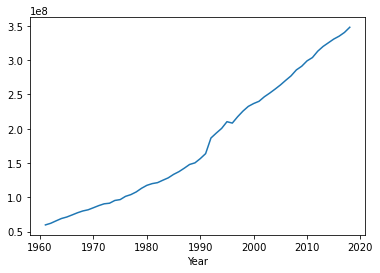

In [23]:
"""
Visualicemos la producción mundial de carne
"""
data.groupby("Year").sum().sum(axis="columns").plot()

<AxesSubplot:xlabel='Year'>

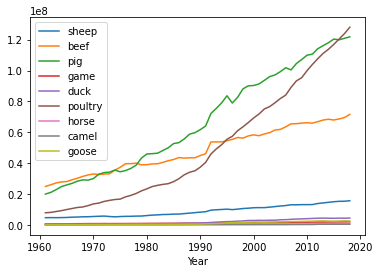

In [24]:
"""
Realicemos el mismo análisis, pero ahora para cda tipo de carne
"""
data.groupby("Year").sum().plot()

### Media, varianza y desviación estándar

In [25]:
"""
Vamos a analizar la producción de pollo en 2018
"""
poultry18 = data["poultry"].loc[:, 2018].dropna()
poultry18

Entity
Afghanistan           28850.0
Albania               15587.0
Algeria              294663.0
American Samoa           25.0
Angola                27208.0
                       ...   
Vietnam              947018.0
Wallis and Futuna        48.0
Yemen                179768.0
Zambia                49487.0
Zimbabwe              66022.0
Name: poultry, Length: 208, dtype: float64

<AxesSubplot:>

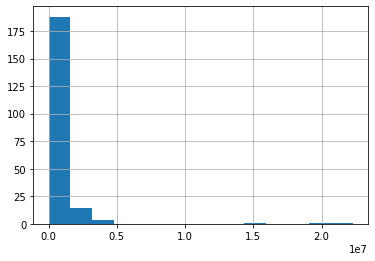

In [26]:
"""
Es claro que la producción de la mayoría de los países producen muy poca carne. 

Si bien, muchas veces se supone que las distribuciones son normales, este no es el caso. 
"""
n = len(poultry18)
nbins = np.round(np.sqrt(n),0).astype("int")
poultry18.hist(bins=nbins)

<AxesSubplot:>

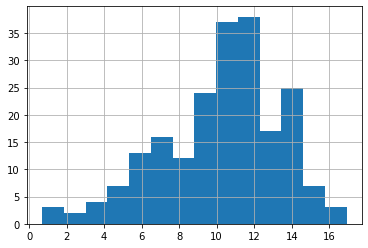

In [27]:
"""
Por esta razón, trataremos de convertir los datos, y así obtener una distribución más parecida a la normal
"""
np.log(poultry18).hist(bins=nbins)

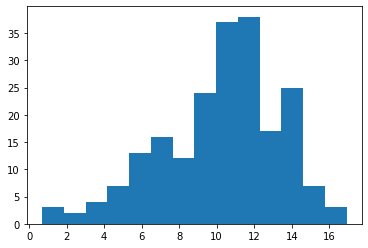

In [28]:
"""
La transformación anterior no ha funcionado muy bien, ya que está cargada a la derecha.
Pero esta pertenece a una familia más amplia de transformaciones.
"""
transformed_p18 = stats.boxcox(poultry18, 0)
plt.hist(transformed_p18, bins=nbins)
plt.show()

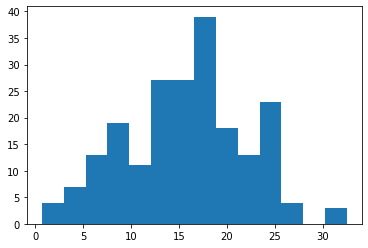

In [29]:
"""
Sin entrar en más detalles, buscaremos la mejor transformación de este tipo.
"""
transformed_p18, lambda_par = stats.boxcox(poultry18)
plt.hist(transformed_p18, bins = nbins)
plt.show()

In [30]:
"""
El parámetro que da esta transformación es muy cercano a cero
"""
lambda_par

0.07023104262129665

In [31]:
"""
Los datos transformado están contenidos en un array
"""
type(transformed_p18)

numpy.ndarray

In [32]:
"""
Ahora calculemos el promedio de los datos transformados.
"""
total = 0

for x in transformed_p18:
    total = total + x 


n = len(transformed_p18)

total/n 


15.756316519276615

In [33]:
"""
Estos mismo se puede obtener con el método .mean()
"""
tp18_mean = np.round(transformed_p18.mean(),2)
tp18_mean

15.76

In [34]:
"""
Verifiquemos que es una buena medida de tendencia central
"""
np.mean(transformed_p18 <= tp18_mean)

0.46634615384615385

In [35]:
"""
Esto contrasta con los datos sin transformar, en la que la media no está al centro
"""
np.mean(poultry18 <= poultry18.mean())

0.8221153846153846

In [36]:
"""
Ahora analizaremos que tan dispersos están los datos respecto a la media
"""
total_quad_diff = 0

for x in transformed_p18:
    dx = x-tp18_mean
    total_quad_diff += dx**2

total_quad_diff/(n-1), np.sqrt(total_quad_diff/(n-1))

(40.07086233262027, 6.330155000678915)

In [37]:
"""
Esto mismo se puede conseguir con el método .var()...
"""
tp18_var = np.round(transformed_p18.var(), 2)
tp18_var

39.88

In [38]:
"""
...y con el método .std()
"""
tp18_std = np.round(transformed_p18.std(), 2)
tp18_std

6.31

In [39]:
"""
Ahora vamos a comprar con la distribución normal teórica en el intervalo correspondiente
"""
X = stats.norm(tp18_mean, tp18_std)
a = transformed_p18.min()
b = transformed_p18.max()


In [40]:
"""
Preparamos los valores teóricos que graficaremos. El método .pdf() 
es la función de densidad de probabilidad. 
"""
x_range = np.linspace(a,b)
y_image = X.pdf(x_range)

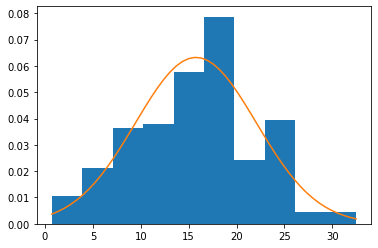

In [41]:
"""
Ahora visualizaremos los datos normalizados con la distribución teórica
"""
plt.hist(transformed_p18, density=True)
plt.plot(x_range, y_image)
plt.show()

c:\Users\julih\anaconda3\envs\workspace\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


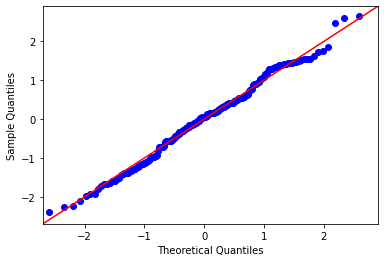

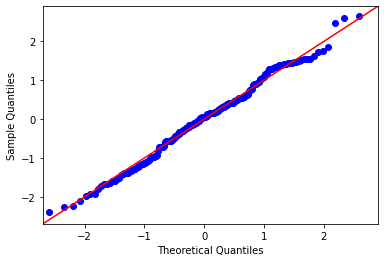

In [42]:

"""
Un gráfico QQ nos indicará que tan cercana está la distribución de ser normal
"""
transformed_p18_standarized  = (transformed_p18-transformed_p18.mean())/transformed_p18.std()
sm.qqplot(transformed_p18_standarized, line="45")

In [43]:
"""
Verifiquemos la regla empírica para nuestra distribución
"""
for k in [1,2,3,4]:
    liminf = tp18_mean-k*tp18_std
    limsup = tp18_mean+k*tp18_std
    event = (transformed_p18>=liminf)&(transformed_p18<=limsup)
    print(np.mean(event))

0.6394230769230769
0.9663461538461539
1.0
1.0


### Mediana, cuartiles y diagramas de caja

Hemos visto que cuando la distribución no tiene características apropiadas, la media no es una buena medida de tendencia central. Un problema recurrente es que tampoco conocemos a priori una distribución teórica subyacente en nuestros datos. 
En esta sección aprenderemos a analizarlos en este caso, echando mano de otras herramientas.

In [44]:
"""
La mediana es "el" valor que divide a la mitad un conjunto ordenado. 
"""
np.mean(poultry18 <= poultry18.median())

0.5

In [45]:
"""
En nuestro caso, debería ser un valor entre la posición 103 y 104 de los datos ordenados.
"""
n = len(poultry18)
n/2 

104.0

In [46]:
"""
Vamos a ubicar estos datos
"""
ordered_p18 = poultry18.sort_values().values
ordered_p18[[n//2-1,n//2]]

array([48200., 48216.])

In [47]:
"""
Elegimos un valor a la mitad de estos dos, para ser la mediana
"""
(ordered_p18[n//2-1]+ordered_p18[n//2])/2

48208.0

In [48]:
"""
Este mismo resultado lo podemos obtener con el método .median()
"""
p18_median = poultry18.median()
p18_median

48208.0

In [49]:
"""
Ahora bien, podemos calcular la mediana de la parte inferior de la tabla.
"""
low_production = poultry18[poultry18<=p18_median]
low_production.median()

4481.0

In [50]:
"""
Correspondería con el cuarto inferior de la tabla. 
"""
np.mean(poultry18<=low_production.median())

0.25

In [51]:
"""
De manera similar, calculemos la mediana de la parte superior de la tabla.
"""
high_production =  poultry18[poultry18>p18_median]
high_production.median()

212632.5

In [52]:
"""
Esta marca correspondería con el cuarto superior. 
"""
np.mean(poultry18>high_production.median())

0.25

In [53]:
"""
Estos números se conocen como cuartiles. Pero recuerda, su definición no es única. 

Por convención el cuartil 0 es el mínimo de los datos y el cuartir 4, el máximo. 
"""
quartiles = np.percentile(poultry18, [0,25,50,75,100])
quartiles

array([2.0000000e+00, 4.5980000e+03, 4.8208000e+04, 2.1057575e+05,
       2.2298230e+07])

In [54]:
"""
Aun así podemos verificar que la definición se cumple. 
"""
for q in quartiles:
    print(np.mean(poultry18<=q))

0.004807692307692308
0.25
0.5
0.75
1.0


In [55]:
 """
 La mitad de los datos al centro se ubicarán entre el primer y tercer cuartiles. 
 """
 central_half = (poultry18>=quartiles[1])&(poultry18<=quartiles[3])
 np.mean(central_half)

0.5

In [56]:
"""
La amplitud de este intervalo se conoce como rango intercuartil
"""
quartiles[3]-quartiles[1]

205977.75

In [57]:
"""
Que se puede calcular de la siguiente manera en Python. 
"""
iqr = stats.iqr(poultry18)
iqr

205977.75

In [58]:
"""
Consideraremos valores atípicos a los datos que estén 
más allá de 1.5 veces el rango intercuartil a partir 
del tercer cuartil. 
"""
np.max(poultry18)/10**6, (quartiles[3] + 1.5*iqr)/10**6

(22.29823, 0.519542375)

In [59]:
"""
Pero si no hay datos que superen la marca anterior, eligiremos
como marca superior al máximo de nuestros datos.
"""
upper_outliers = np.min([np.max(poultry18), quartiles[3] + 1.5*iqr])
upper_outliers

519542.375

In [60]:
"""
De manera similar, consideraremos valores atípicos a los datos
que estén más allá de 1.5 veces el rango intercuartil a partir
del primer cuartil. 
"""
np.min(poultry18), quartiles[1] - 1.5*iqr

(2.0, -304368.625)

In [61]:
"""
Pero si no hay datos por debajo de la marca anterior, eligiremos
como marca inferior al mínimo de nuestros datos.
"""
lower_outliers = np.max([np.min(poultry18), quartiles[1] - 1.5*iqr])
lower_outliers

2.0

In [62]:
"""
De esta manera, ya podemos detectar a los datos atípicos
"""
outliers = poultry18[poultry18>upper_outliers]
outliers.count()

39

<AxesSubplot:>

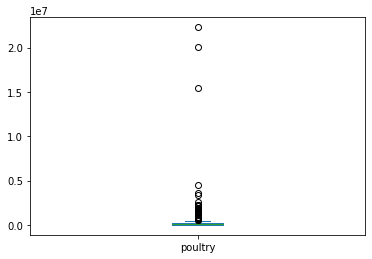

In [63]:
"""
Podemos visualizar esta información a través de un diagrama de caja.
"""
poultry18.plot.box()

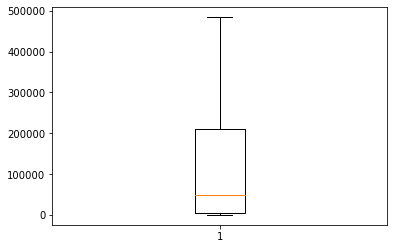

In [64]:
"""
Pero omitamos los valores atípicos, para ver la estructura central
"""
plt.boxplot(poultry18, showfliers=False)
plt.show()

In [65]:
"""
De nuestros datos originales, subseleccionamos la producción de res, puerco y pollo, en el año 2018. 
"""
# https://stackoverflow.com/questions/18835077/selecting-from-multi-index-pandas
meat18 = data[["beef", "pig", "poultry"]].query("Year==2018")
meat18.head()

,,beef,pig,poultry
Entity,Year,,,
Afghanistan,2018,129691.0,NaN,28850.0
Albania,2018,38544.0,10317.0,15587.0
Algeria,2018,153192.0,112.0,294663.0
American Samoa,2018,4.0,315.0,25.0
Angola,2018,104761.0,96149.0,27208.0


In [66]:
"""
Verificamos cuantos datos nulos hay en cada columna
"""
meat18.isna().sum()

beef        7
pig        27
poultry     5
dtype: int64

In [67]:
"""
¿Existirá algún patrón entre los países que no producen carne de puerco?
"""
meat18[meat18["pig"].isna()]

,,beef,pig,poultry
Entity,Year,,,
Afghanistan,2018,129691.0,NaN,28850.0
Bahrain,2018,986.0,NaN,6956.0
Bangladesh,2018,205684.0,NaN,254433.0
Comoros,2018,1282.0,NaN,601.0
Djibouti,2018,6414.0,NaN,NaN
Eritrea,2018,23242.0,NaN,1559.0
Faeroe Islands,2018,94.0,NaN,NaN
Falkland Islands,2018,141.0,NaN,9.0
Greenland,2018,NaN,NaN,NaN


In [68]:
"""
¿Qué pasa con Indonesia?
"""
meat18.loc["Indonesia"]

,beef,pig,poultry
Year,,,
2018,563161.0,327215.0,2588164.0


In [69]:
"""
¿Qué países no tienen registro alguno?
"""
meat18.isna().sum(axis="columns")==3

Entity             Year
Afghanistan        2018    False
Albania            2018    False
Algeria            2018    False
American Samoa     2018    False
Angola             2018    False
                           ...  
Wallis and Futuna  2018    False
Western Sahara     2018     True
Yemen              2018    False
Zambia             2018    False
Zimbabwe           2018    False
Length: 213, dtype: bool

In [70]:
"""
¿Qué explica que estos países carezcan de registro en 2018?
"""
meat18[meat18.isna().sum(axis="columns")==3]

,,beef,pig,poultry
Entity,Year,,,
Greenland,2018,NaN,NaN,NaN
Western Sahara,2018,NaN,NaN,NaN


In [71]:
"""
Vamos a eliminar a los países que no tienen registros 
"""
meat18 = meat18[meat18.isna().sum(axis="columns")<3]
meat18

,,beef,pig,poultry
Entity,Year,,,
Afghanistan,2018,129691.0,NaN,28850.0
Albania,2018,38544.0,10317.0,15587.0
Algeria,2018,153192.0,112.0,294663.0
American Samoa,2018,4.0,315.0,25.0
Angola,2018,104761.0,96149.0,27208.0
...,...,...,...,...
Vietnam,2018,426582.0,3816414.0,947018.0
Wallis and Futuna,2018,3.0,317.0,48.0
Yemen,2018,117617.0,NaN,179768.0


In [72]:
"""
Decidimos rellenar los espacios nulos con ceros, suponiendo que la falta
del registro es porque no hay producción (al menos oficial).
"""
meat18 = meat18.fillna(0)
meat18 

,,beef,pig,poultry
Entity,Year,,,
Afghanistan,2018,129691.0,0.0,28850.0
Albania,2018,38544.0,10317.0,15587.0
Algeria,2018,153192.0,112.0,294663.0
American Samoa,2018,4.0,315.0,25.0
Angola,2018,104761.0,96149.0,27208.0
...,...,...,...,...
Vietnam,2018,426582.0,3816414.0,947018.0
Wallis and Futuna,2018,3.0,317.0,48.0
Yemen,2018,117617.0,0.0,179768.0


In [73]:
"""
Calculemos el tercer cuartil de cada columna.
"""
q3 = meat18.quantile(.75)
q3

beef       194508.5
pig        112682.5
poultry    207021.0
Name: 0.75, dtype: float64

In [74]:
"""
Ahora, el primer cuartil...
"""
q1 = meat18.quantile(.25)
q1

beef       2541.5
pig         462.5
poultry    3996.5
Name: 0.25, dtype: float64

In [75]:
"""
Finalmente, el rango intercuartil.
"""
iqr = q3-q1
iqr

beef       191967.0
pig        112220.0
poultry    203024.5
dtype: float64

In [76]:
"""
Con estos datos, podemos ya ubicar el bigote superior, que nos indicara los 
datos atípicos superiores para cada tipo de carne. 
"""
upper_whisker = q3+1.5*iqr

In [77]:
"""
Ahora, localizaremos los países que destacan en la producción de cada uno de 
los tipo de carne
"""
meat18 >= upper_whisker

,,beef,pig,poultry
Entity,Year,,,
Afghanistan,2018,False,False,False
Albania,2018,False,False,False
Algeria,2018,False,False,False
American Samoa,2018,False,False,False
Angola,2018,False,False,False
...,...,...,...,...
Vietnam,2018,False,True,True
Wallis and Futuna,2018,False,False,False
Yemen,2018,False,False,False


In [78]:
"""
Contabilicemos en cuantros rubros destacan.
"""
(meat18 >= upper_whisker).sum(axis="columns")

Entity             Year
Afghanistan        2018    0
Albania            2018    0
Algeria            2018    0
American Samoa     2018    0
Angola             2018    0
                          ..
Vietnam            2018    2
Wallis and Futuna  2018    0
Yemen              2018    0
Zambia             2018    0
Zimbabwe           2018    0
Length: 211, dtype: int64

In [79]:
"""
Nos interesan solo los países que destaquen en la producción de los tres productos
"""
(meat18 >= upper_whisker).sum(axis="columns")==3

Entity             Year
Afghanistan        2018    False
Albania            2018    False
Algeria            2018    False
American Samoa     2018    False
Angola             2018    False
                           ...  
Vietnam            2018    False
Wallis and Futuna  2018    False
Yemen              2018    False
Zambia             2018    False
Zimbabwe           2018    False
Length: 211, dtype: bool

In [80]:
"""
Guardamos los resultados de nuestro análisis.
"""
top_producers = meat18[(meat18 >= upper_whisker).sum(axis="columns")==3]
top_producers

,,beef,pig,poultry
Entity,Year,,,
Argentina,2018,3066000.0,620549.0,2114952.0
Australia,2018,2219103.0,417426.0,1235197.0
Brazil,2018,9900000.0,3787660.0,15497606.0
Canada,2018,1231352.0,2142283.0,1474253.0
China,2018,6455137.0,54983905.0,20116635.0
Colombia,2018,885929.0,335884.0,1592830.0
France,2018,1436358.0,2166417.0,1786112.0
Germany,2018,1123452.0,5369944.0,1570644.0
India,2018,2610256.0,296145.0,3616432.0


In [81]:
"""
Analicemos la proporción de la producción que se alcanza solo con estos países.
"""
top_producers.sum()/meat18.sum()

beef       0.674270
pig        0.793752
poultry    0.690094
dtype: float64

In [82]:
"""
Revisemos la capacidad de producción de mayor a menor
"""
top_producers.sum(axis="columns").sort_values(ascending=False)

Entity          Year
China           2018    81555677.0
United States   2018    46460398.0
Brazil          2018    29185266.0
Russia          2018     9895308.0
Germany         2018     8064040.0
Mexico          2018     6860082.0
Spain           2018     6821200.0
India           2018     6522833.0
Argentina       2018     5801501.0
France          2018     5388887.0
Canada          2018     4847888.0
Poland          2018     4442095.0
Australia       2018     3871726.0
United Kingdom  2018     3788132.0
Italy           2018     3553084.0
Indonesia       2018     3478540.0
Colombia        2018     2814643.0
dtype: float64

In [83]:
"""
Para nuestros análisis posteriores, haremos una lista con los países productores más importantes
"""
top_producers_2018 = [country for country, year in top_producers.index]
top_producers_2018

['Argentina',
 'Australia',
 'Brazil',
 'Canada',
 'China',
 'Colombia',
 'France',
 'Germany',
 'India',
 'Indonesia',
 'Italy',
 'Mexico',
 'Poland',
 'Russia',
 'Spain',
 'United Kingdom',
 'United States']

In [84]:
"""
Finalmente, crearemos un marco de datos del historias de estos productores desde el año 2000
"""
top2000 = data[["beef", "pig", "poultry"]].loc[top_producers_2018].query("Year>=2000")
top2000

beef         pig     poultry
Entity        Year                                    
Argentina     2000   2718000.0    213965.0   1000260.0
              2001   2461000.0    197504.0    993122.0
              2002   2493000.0    165292.0    742310.0
              2003   2658000.0    149755.0    781365.0
              2004   3024000.0    160000.0    909153.0
...                        ...         ...         ...
United States 2014  11698116.0  10368227.0  20399386.0
              2015  10777601.0  11120748.0  21017380.0
              2016  11470607.0  11320182.0  21483082.0
              2017  11907239.0  11610981.0  21914241.0
              2018  12219203.0  11942965.0  22298230.0

[323 rows x 3 columns]

In [85]:
"""
Verificamos que no hay datos nulos
"""
top2000.isna().sum()

beef       0
pig        0
poultry    0
dtype: int64

In [86]:
"""
Ahora sumaremos el total de producción para cada par país/año
"""
top2000_total = top2000.sum(axis="columns")
top2000_total.head()

Entity     Year
Argentina  2000    3932225.0
           2001    3651626.0
           2002    3400602.0
           2003    3589120.0
           2004    4093153.0
dtype: float64

In [87]:
"""
Realizaremos dos tipos de análisis. El primero haciendo énfasis en los países, 
mientras que el segundo, con énfasis en los años. 
"""
top2000_countries = top2000_total.unstack(0)
top2000_countries.head()

Entity,Argentina,Australia,Brazil,Canada,China,Colombia,France,Germany,India,Indonesia,Italy,Mexico,Poland,Russia,Spain,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,
2000,3932225.0,2995540.0,15303550.0,3968230.0,58596315.0,1354395.0,5987273.0,6075602.0,3611915.0,1616035.0,3724202.0,4307307.0,2860900.0,4251085.0,4545708.0,3117200.0,37189009.0
2001,3651626.0,3106471.0,15840750.0,4107780.0,59286109.0,1394017.0,6050811.0,6285607.0,3678451.0,1723849.0,3782523.0,4475002.0,2868800.0,4277143.0,4676966.0,2988828.0,37881995.0
2002,3400602.0,3215794.0,17176215.0,4266260.0,60294798.0,1433226.0,6037796.0,6307192.0,3851504.0,1944889.0,3844416.0,4660737.0,3127500.0,4538260.0,4959418.0,3024275.0,38335121.0
2003,3589120.0,3120875.0,18256410.0,4197970.0,62013778.0,1444198.0,5923968.0,6419519.0,3981630.0,2044310.0,3669845.0,4740286.0,3221126.0,4803322.0,5104646.0,2984489.0,39091077.0
2004,4093153.0,3252236.0,19779410.0,4559020.0,63340301.0,1556336.0,5764071.0,6620247.0,4091639.0,1895614.0,3725173.0,4932513.0,3062418.0,4826916.0,4893590.0,2990973.0,39471934.0


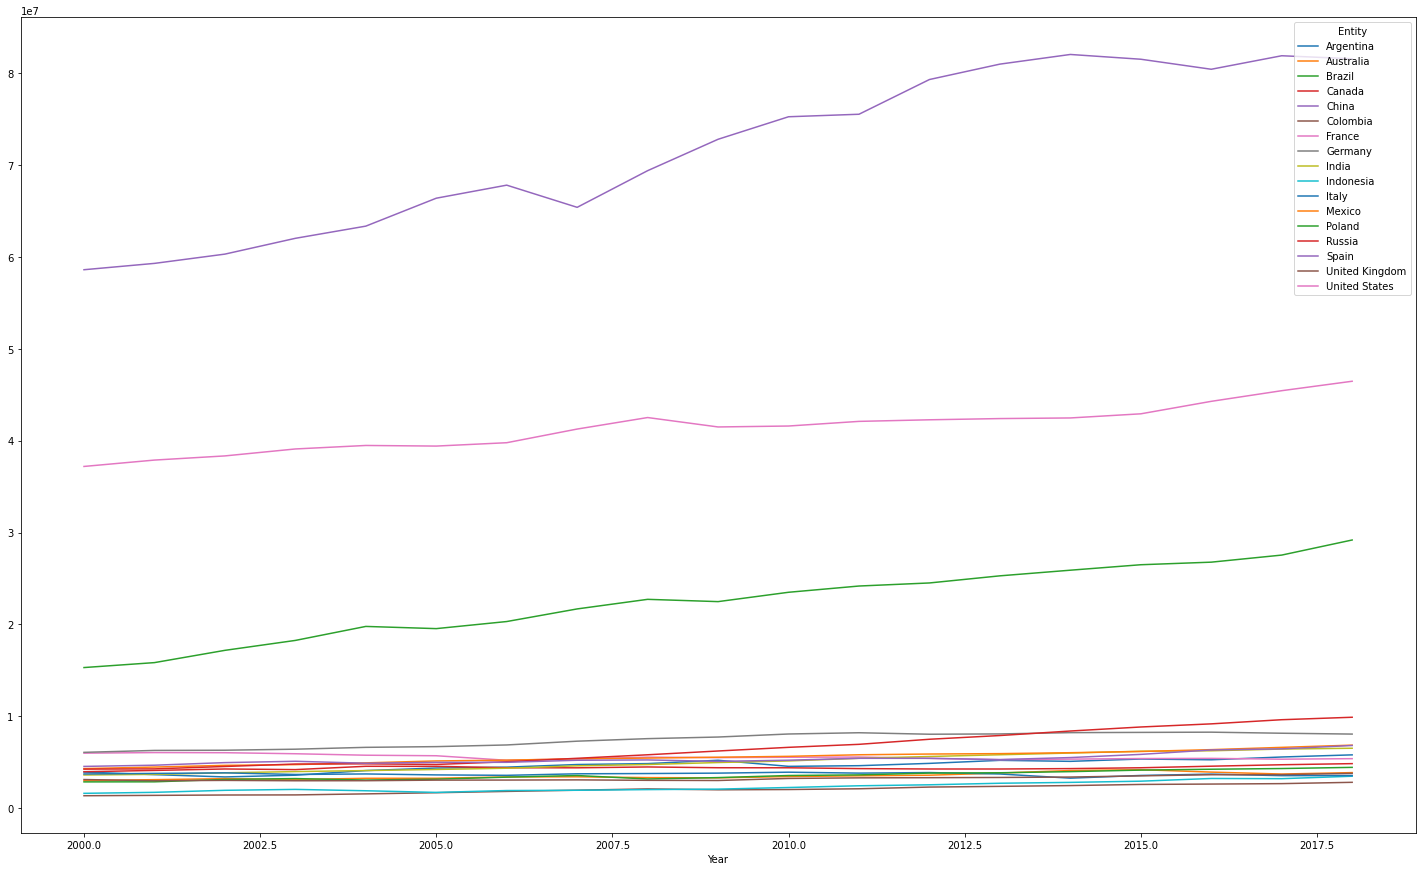

In [88]:
"""
Trazamos una serie de tiempo para la producción país por país
"""
top2000_countries.plot(figsize=(25,15))
plt.show()

In [89]:
"""
Ahora hagamos revisemos la producción año por año, agrupada por países
"""
top2000_years = top2000_total.unstack(1)
top2000_years.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Entity,,,,,,,,,,,,,,,,,,,
Argentina,3932225.0,3651626.0,3400602.0,3589120.0,4093153.0,4368953.0,4465870.0,4751610.0,4850845.0,5213651.0,4552735.0,4624217.0,4875737.0,5205792.0,5096940.0,5348751.0,5266749.0,5569935.0,5801501.0
Australia,2995540.0,3106471.0,3215794.0,3120875.0,3252236.0,3257255.0,3401016.0,3414217.0,3327127.0,3299324.0,3440534.0,3523279.0,3588766.0,3822404.0,4099169.0,4187655.0,3926722.0,3716791.0,3871726.0
Brazil,15303550.0,15840750.0,17176215.0,18256410.0,19779410.0,19540190.0,20311543.0,21683575.0,22727080.0,22479020.0,23495226.0,24175530.0,24509628.0,25284370.0,25898331.0,26492573.0,26772876.0,27542668.0,29185266.0
Canada,3968230.0,4107780.0,4266260.0,4197970.0,4559020.0,4553040.0,4397840.0,4392970.0,4486240.0,4402060.0,4396375.0,4306405.0,4264298.0,4263415.0,4307718.0,4398717.0,4569268.0,4727179.0,4847888.0
China,58596315.0,59286109.0,60294798.0,62013778.0,63340301.0,66379544.0,67800405.0,65386255.0,69374667.0,72791903.0,75243357.0,75515873.0,79294526.0,80970665.0,82021781.0,81502700.0,80411525.0,81881931.0,81555677.0


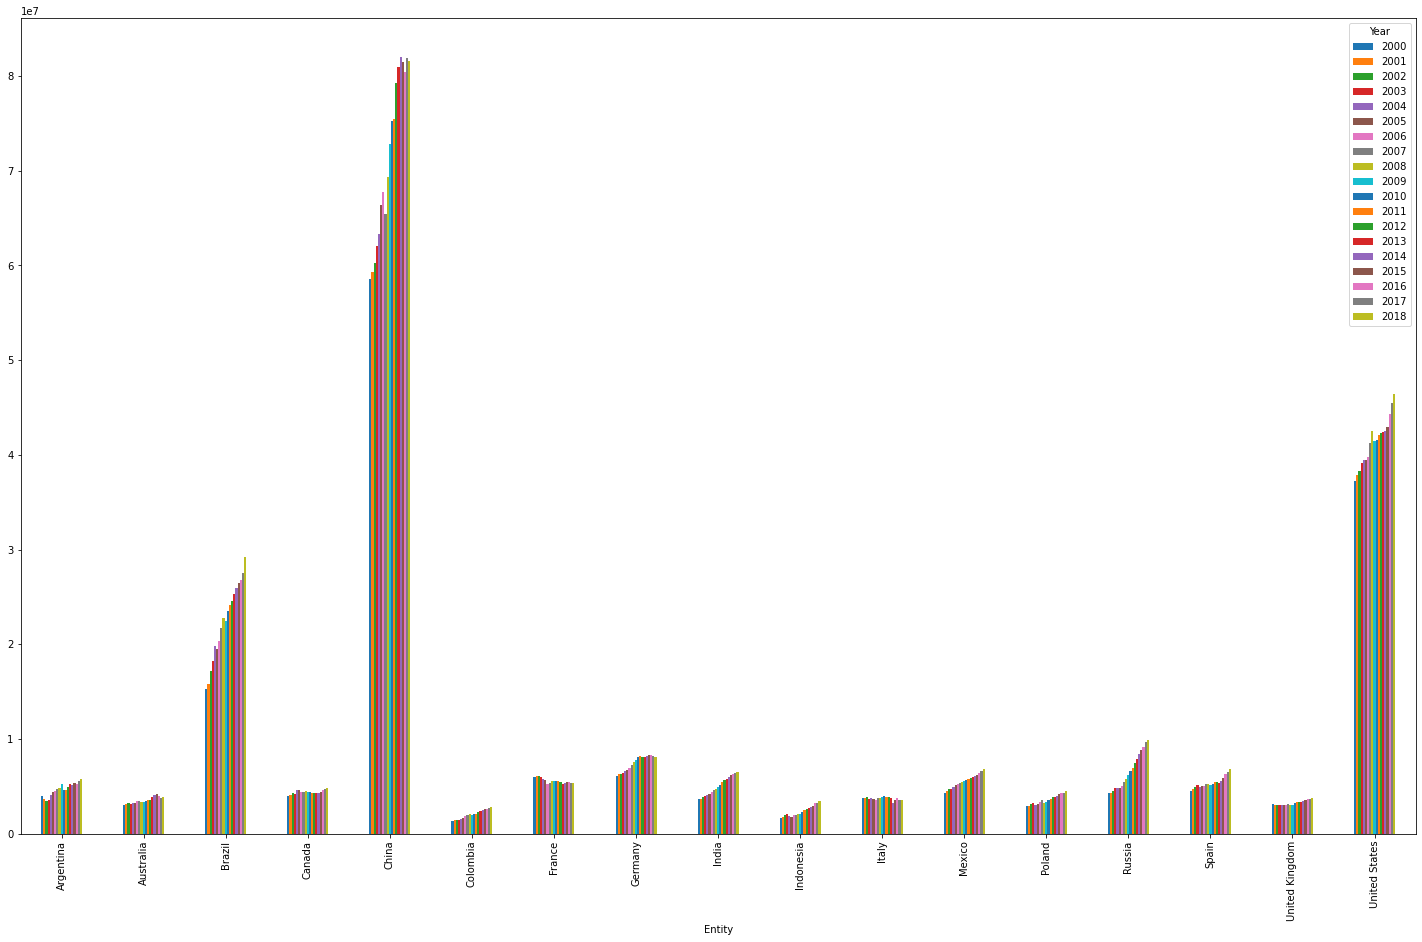

In [90]:
"""
En lugar de una serie de tiempo, utilizaremos un diagrama de barras
"""
top2000_years.plot.bar(figsize=(25,15))
plt.show()

### Covarianza y correlación. 

Esta sección será más técnica. Así que antes de profundizar en los detalles, presentaremos el resultado y lo interpretaremos de forma intuitiva. 

1. La siguiente matriz nos indica la "fuerza" de la relación entre la producción de dos países. 
2. En valor absoluto, si la relación es cercana a cero, la relación es débil y si es cercana a uno, es fuerte.
3. Si el signo es positivo, quiere decir que si una tiende a crecer, la otra también lo hará. 
4. Si por el contrario, el signo es negativo, si una tiende a crecer, la otra decrecerá.


In [91]:
"""
¿Qué países van en contra de la tendencia global de producción?
"""
top2000_countries.corr()

Entity,Argentina,Australia,Brazil,Canada,China,Colombia,France,Germany,India,Indonesia,Italy,Mexico,Poland,Russia,Spain,United Kingdom,United States
Entity,,,,,,,,,,,,,,,,,
Argentina,1.000000,0.794964,0.929069,0.638278,0.894104,0.945708,-0.848619,0.872960,0.912064,0.808425,-0.373745,0.931368,0.854613,0.885633,0.796703,0.784369,0.919691
Australia,0.794964,1.000000,0.881760,0.427206,0.903749,0.904141,-0.735411,0.837360,0.913261,0.874195,-0.543829,0.862793,0.903498,0.900630,0.755246,0.827636,0.787255
Brazil,0.929069,0.881760,1.000000,0.659968,0.962559,0.983792,-0.814289,0.944322,0.981685,0.918411,-0.352413,0.991146,0.944889,0.958014,0.881983,0.858896,0.971142
Canada,0.638278,0.427206,0.659968,1.000000,0.495213,0.614650,-0.506325,0.459464,0.566490,0.576812,-0.291617,0.694540,0.592650,0.569762,0.745191,0.545767,0.735288
China,0.894104,0.903749,0.962559,0.495213,1.000000,0.958843,-0.801099,0.957763,0.978016,0.893106,-0.352650,0.951052,0.917408,0.949846,0.789506,0.840143,0.892448
Colombia,0.945708,0.904141,0.983792,0.614650,0.958843,1.000000,-0.811287,0.924400,0.987125,0.931256,-0.393474,0.984946,0.956289,0.973149,0.891671,0.893839,0.963631
France,-0.848619,-0.735411,-0.814289,-0.506325,-0.801099,-0.811287,1.000000,-0.794688,-0.766451,-0.621091,0.377351,-0.798245,-0.746372,-0.699824,-0.580783,-0.568788,-0.750238
Germany,0.872960,0.837360,0.944322,0.459464,0.957763,0.924400,-0.794688,1.000000,0.936863,0.811915,-0.189190,0.917579,0.850169,0.886735,0.727207,0.747618,0.881647
India,0.912064,0.913261,0.981685,0.566490,0.978016,0.987125,-0.766451,0.936863,1.000000,0.954019,-0.378520,0.981281,0.967331,0.989891,0.886871,0.911800,0.945404


<AxesSubplot:xlabel='Entity', ylabel='Entity'>

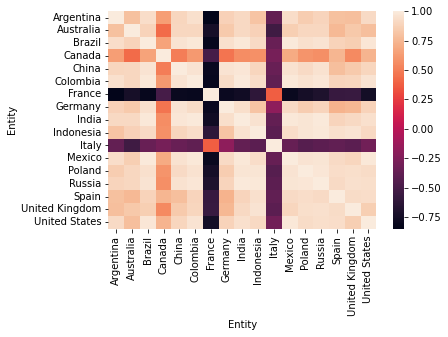

In [92]:
"""
Con todos estos números, es dificil tener un panorama global de la correlación productiva entre países. 
Por eso utilizaremos un mapa de calor, que refleja la correlación con intensidades de colores. 
"""
sns.heatmap(top2000_countries.corr())

<AxesSubplot:xlabel='Entity', ylabel='Entity'>

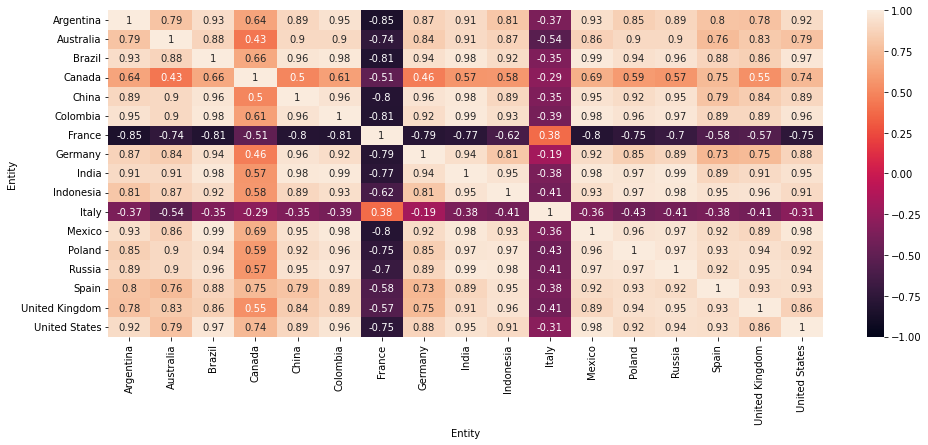

In [93]:
"""
Mejoraremos la visualización utilizando algunos parámetros extras.
"""
plt.figure(figsize=(16, 6))
sns.heatmap(top2000_countries.corr(), vmin=-1, vmax=1, annot=True)

Para entender el significado de este número, así como sus limitaciones, describiremos como se obtiene para el caso de la relación entre México y Estados Unidos. 

In [94]:
"""
Seleccionamos los datos correspondientes a México
"""
mex = top2000_countries["Mexico"]
mex.tail()

Year
2014    6037566.0
2015    6169974.0
2016    6370688.0
2017    6617959.0
2018    6860082.0
Name: Mexico, dtype: float64

In [95]:
"""
Seleccionamos los datos correspondientes a los Estados Unidos
"""
usa = top2000_countries["United States"]
usa.tail()

Year
2014    42465729.0
2015    42915729.0
2016    44273871.0
2017    45432461.0
2018    46460398.0
Name: United States, dtype: float64

In [96]:
"""
Calculamos y guardamos la media de producción en México
"""
mex_mean = mex.mean()
mex_mean/10**6

5.536553789473684

In [97]:
"""
Calculamos y guardamos la media de producción en Estados Unidos
"""
usa_mean = usa.mean()
usa_mean/10**6

41.38385068421052

In [98]:
"""
La covarianza nos indica que tan lejanos están los pares de datos para un año dado, del par promedio.
"""
covariance = 0

for x,y in zip(mex, usa):
    dx = x - mex_mean
    dy = y - usa_mean
    covariance += dx*dy 

covariance/(len(mex)-1)


1760561660668.9297

In [99]:
"""
Este resultado se puede obtener de la función numpy.cov()
"""
np.cov(mex, usa)

array([[5.18520099e+11, 1.76056166e+12],
       [1.76056166e+12, 6.23669294e+12]])

Un problema importante con la covarianza es que es sensible al cambio de unidades de medición. Por ejemplo, si decidimos medir en kilogramos en lugar de toneladas, ¡la covarianza se multiplicará por un millón! Por esta razón, estandarizaremos nuestros datos. 

In [100]:
"""
Calculamos y guardamos la desviación estándar de los datos correspondientes a México.
"""
mex_std = mex.std()
mex_std


720083.3970300152

In [101]:
"""
Estandarizamos los datos correspondientes a México.
"""
mex_standard = (mex-mex_mean)/mex_std
mex_standard.mean(), mex_standard.std()

(-4.2071609354216456e-16, 1.0)

In [102]:
"""
Calculamos y guardamos la desviación estándar de los datos correspondientes a Estados Unidos.
"""
usa_std = usa.std()
usa_std

2497337.1705373633

In [103]:
"""
Estandarizamos los datos correspondientes a Estados Unidos.
"""
usa_standard = (usa-usa_mean)/usa_std
usa_standard.mean(), usa_standard.std()

(9.816708849317175e-16, 0.9999999999999998)

In [104]:
"""
Caculemos ahora la covarianza de las series normalizadas. 
"""
np.cov(mex_standard, usa_standard)

array([[1.        , 0.97901932],
       [0.97901932, 1.        ]])

In [105]:
"""
Este es el mismo resultado que obtenemos con la función numpy.corrcoef(),
que calcula los coeficientes de correlación entre dos arreglos.
"""
np.corrcoef(mex, usa)

array([[1.        , 0.97901932],
       [0.97901932, 1.        ]])

In [106]:
"""
Observa que coincide con el resultado arrojado por el método .corr()
"""
top2000_countries.corr()["Mexico"].loc["United States"]

0.979019317828707

### Regresiones lineales

Ahora veremos como hacer proyecciones, utilizando regresiones lineales. Crudamente, trataremos de aproximas los datos correspondientes con funciones lineales, de manera que los residuales (errores puntuales entre el datos y la proyección) se minimicen. 

En esta sección final del módulo, nos centraremos en las regresiones lineales univariadas, pero en los próximos módulos abarcaremos regresiones de muchas otras clases, tanto univariadas como multivariadas, implementándolas desde cero. 


Analizaremos el caso de México, para después generalizar el resultado a todos los países productores que estamos considerando. 

In [107]:
"""
Primero extraemos el periodo de tiempo a considerar. Lo convertimos en un array para
manipularlo de manera más sencilla. 
"""
t = np.array(mex.index)
t 


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [108]:
"""
Hacemos lo mismo con los valores de la producción total correspondiente a cada año. 
"""
y = mex.values
y

array([4307307., 4475002., 4660737., 4740286., 4932513., 5141212.,
       5227368., 5371742., 5452906., 5545243., 5642039., 5812934.,
       5892326., 5936638., 6037566., 6169974., 6370688., 6617959.,
       6860082.])

In [109]:
"""
Calculemos la correlación entre el tiempo y la producción.
"""
np.corrcoef(t,y)

array([[1.       , 0.9931632],
       [0.9931632, 1.       ]])

In [110]:
"""
Ahora, calculamos la covarianza. Esta información nos será útil para 
calcular los coeficientes de la regresión lineal.  
"""
np.cov(t, y)

array([[3.16666667e+01, 4.02443200e+06],
       [4.02443200e+06, 5.18520099e+11]])

In [111]:
"""
Vamos a extraer la información en cuatro diferentes variables, que nos indicarán 
el valor de una variable respecto a otra. 
"""
stt, sty, syt, syy = np.cov(t, y).ravel()
np.isclose(sty,syt)

True

In [112]:
"""
La pendiente b de nuestra regresión lineal está dada por esta sencilla fórmula
"""
b = sty/stt
b

127087.3263157895

In [113]:
"""
Calculemos ahora el año promedio de nuestro rango de tiempo. 
"""
t_mean = t.mean()
t_mean

2009.0

In [114]:
"""
Calculemos la producción promedio en este intervalo. 
"""
y_mean = y.mean()
y_mean

5536553.7894736845

In [115]:
"""
Finalmente, apoyándonos en un teorema que nos dice que la regresión lineal pasa por 
el punto promedio, despejamos para obtener la ordenada al origen.
"""
a = y_mean - b*t_mean
a 

-249781884.7789474

In [116]:
"""
Declararemos un nuevo rango de tiempo, que incluya el anterior, y algunos años
a futuro para realizar nuestras proyecciones. 
"""
t_range = np.arange(2000, 2023)
t_range

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [117]:
"""
Finalmente, calculamos los valores de la proyección utilizando la fórmula 
y=a+b*t de nuestra regresión lineal.
"""
y_pred = a + b*t_range
np.round(y_pred, 0)

array([4392768., 4519855., 4646943., 4774030., 4901117., 5028204.,
       5155292., 5282379., 5409466., 5536554., 5663641., 5790728.,
       5917816., 6044903., 6171990., 6299078., 6426165., 6553252.,
       6680340., 6807427., 6934514., 7061602., 7188689.])

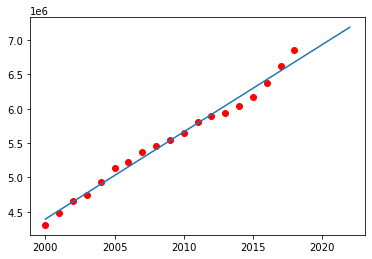

In [118]:
"""
Comparemos visualmente los datos con las proyecciones
"""
plt.scatter(t, y, color="red")
plt.plot(t_range, y_pred)
plt.show()

In [119]:
"""
Una medida de la calidad de nuestra regresión esta dada por el número R2.
Si es cercano a cero, la regresión es casi tan buena como tomar el promedio.
En cambio si se acerca a uno, la regresión es casi perfecta. 
"""
r2 = (sty*syt)/(stt*syy)
r2

0.986373149514181

Finalmente, vamos a aprender como ajustar un modelo linear con el módulo `SciKit Learn`. 

In [120]:
"""
Podríamos decir que se puede hacer en dos renglones, 
pero debemos tener cuidado con la clase de objetos que recibe como argumentos. 
"""
try:
    reg = LinearRegression()
    reg.fit(t,y)
except Exception as e:
    print(e)

Expected 2D array, got 1D array instead:
array=[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [121]:
"""
El método fit recibe como primer argumento una matriz. Así que si nuestros datos están en forma de vector, 
sera necesario reacomodarlos como una matriz columna.
"""
t = t.reshape(-1,1)
t

array([[2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018]], dtype=int64)

In [122]:
"""
Ahora sí, en dos sencillos pasos ajustamos el modelo lineal.
"""
reg = LinearRegression()
reg.fit(t,y)
reg

LinearRegression()

In [123]:
"""
Extraigamos la pendiente y la ordenada al origen
"""
reg.coef_, reg.intercept_

(array([127087.32631579]), -249781884.7789474)

In [124]:
"""
Verifiquemos que el valor anterior es el mismo que la pendiente que obtuvimos con la fórmula
"""
np.isclose(reg.coef_[0], b)

True

In [125]:
"""
Hagamos los mismo con la ordenada al origen.
"""
np.isclose(reg.intercept_, a)

True

In [126]:
"""
El método .score nos devuelve el valor R2 calculado anteriormente
"""
reg.score(t, y)

0.9863731495141806

In [127]:
"""
Verifiquemos que en efecto son iguales
"""
np.isclose(r2, reg.score(t, y))

True

In [128]:
"""
Finalmente, utilicemos el método predict para hacer las regresiones.
"""
y_pred = reg.predict(t_range.reshape(-1,1))
y_pred

array([4392767.85263157, 4519855.17894736, 4646942.50526315,
       4774029.83157894, 4901117.15789473, 5028204.48421052,
       5155291.81052631, 5282379.1368421 , 5409466.46315789,
       5536553.78947368, 5663641.11578947, 5790728.44210526,
       5917815.76842105, 6044903.09473684, 6171990.42105263,
       6299077.74736843, 6426165.07368422, 6553252.40000001,
       6680339.7263158 , 6807427.05263159, 6934514.37894738,
       7061601.70526317, 7188689.03157896])

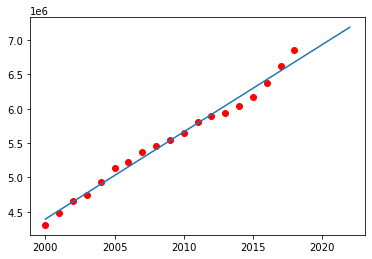

In [129]:
"""
Comparemos ahora nuestras proyecciones con los datos
"""
plt.scatter(t, y, color="red")
plt.plot(t_range, y_pred)
plt.show()

In [130]:
"""
Finalmente, utilizando todas las herramientas aprendidas en estos dos módulos, 
haremos la proyección de la producción total de res, puerco y pollo para los
mayores productores de carne en el mundo. 
"""
future_production = dict()

for country in top2000_countries:
    reg = LinearRegression()
    y = top2000_countries[country]
    reg.fit(t, y)
    future_production[country] = reg.predict(t_range.reshape(-1,1))

future_production
    

{'Argentina': array([3642625.3631579 , 3756368.81403509, 3870112.26491228,
        3983855.71578947, 4097599.16666666, 4211342.61754385,
        4325086.06842104, 4438829.51929823, 4552572.97017542,
        4666316.42105263, 4780059.87192982, 4893803.32280701,
        5007546.7736842 , 5121290.22456139, 5235033.67543858,
        5348777.12631577, 5462520.57719296, 5576264.02807015,
        5690007.47894737, 5803750.92982456, 5917494.38070175,
        6031237.83157894, 6144981.28245613]),
 'Australia': array([3005592.91578947, 3060918.27017543, 3116243.6245614 ,
        3171568.97894736, 3226894.33333333, 3282219.6877193 ,
        3337545.04210526, 3392870.39649123, 3448195.75087719,
        3503521.10526316, 3558846.45964912, 3614171.81403509,
        3669497.16842104, 3724822.52280702, 3780147.87719297,
        3835473.23157895, 3890798.5859649 , 3946123.94035088,
        4001449.29473683, 4056774.6491228 , 4112100.00350876,
        4167425.35789473, 4222750.71228069]),
 'Brazil': arr

In [131]:
"""
Reestructuramos el resultado anterior como un marco de datos
"""
future_production = pd.DataFrame(future_production).set_index(t_range)
future_production.tail()

,Argentina,Australia,Brazil,Canada,China,Colombia,France,Germany,India,Indonesia,Italy,Mexico,Poland,Russia,Spain,United Kingdom,United States
2018,5.690007e+06,4.001449e+06,2.887225e+07,4.597283e+06,8.531169e+07,2.787475e+06,5.229570e+06,8.649775e+06,6.607466e+06,3.206208e+06,3.604882e+06,6.680340e+06,4.326275e+06,9.602545e+06,6.237740e+06,3.607000e+06,4.522919e+07
2019,5.803751e+06,4.056775e+06,2.958640e+07,4.620299e+06,8.681614e+07,2.870781e+06,5.191955e+06,8.784784e+06,6.783079e+06,3.302086e+06,3.594728e+06,6.807427e+06,4.411036e+06,9.939191e+06,6.333968e+06,3.648011e+06,4.565645e+07
2020,5.917494e+06,4.112100e+06,3.030054e+07,4.643315e+06,8.832058e+07,2.954087e+06,5.154340e+06,8.919792e+06,6.958692e+06,3.397964e+06,3.584574e+06,6.934514e+06,4.495798e+06,1.027584e+07,6.430196e+06,3.689022e+06,4.608370e+07
2021,6.031238e+06,4.167425e+06,3.101469e+07,4.666331e+06,8.982503e+07,3.037392e+06,5.116725e+06,9.054801e+06,7.134305e+06,3.493842e+06,3.574420e+06,7.061602e+06,4.580560e+06,1.061248e+07,6.526424e+06,3.730033e+06,4.651096e+07
2022,6.144981e+06,4.222751e+06,3.172883e+07,4.689346e+06,9.132947e+07,3.120698e+06,5.079110e+06,9.189809e+06,7.309918e+06,3.589720e+06,3.564266e+06,7.188689e+06,4.665322e+06,1.094913e+07,6.622652e+06,3.771044e+06,4.693822e+07


<AxesSubplot:>

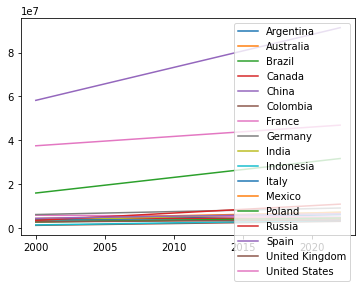

In [132]:
"""
Visualicemos nuestros resultados. 
"""
future_production.plot()

¿Qué aplicaciones crees que podrían tener nuestros resultados en una empresa productora de carne en México?